<center><h2>Importing required libraries</h2></center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import tqdm

from tensorflow.keras.layers import BatchNormalization

from imutils import paths

import pickle

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from keras import optimizers

from tensorflow.keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

<center><h2>Importing images</h2><center>

In [ ]:
imagepaths = list(paths.list_images("../aug1"))
len(imagepaths)

0

In [ ]:
data = []
labels = []
for images in tqdm(imagepaths):
    label = images.split(os.path.sep)[-2]
    image =cv2.imread(images)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image, (50,50))
    image = np.asarray(image)
    data.append(image)
    labels.append(label)

100%|██████████████████████████████████████████████████████████████████████| 126020/126020 [00:00<00:00, 918507.55it/s]


In [ ]:
imagepaths = list(paths.list_images("../../test"))
len(imagepaths)

581

In [ ]:
t_data = []
t_labels = []
for images in tqdm(list(paths.list_images("../../test"))):
    label = images.split(os.path.sep)[-2]
    image =cv2.imread(images)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image, (50,50))
    image = np.asarray(image)
    t_data.append(image)
    t_labels.append(label)

100%|████████████████████████████████████████████████████████████████████████████████| 571/571 [00:17<00:00, 32.56it/s]


<center><h3>In case, have pickled data</h3></center>

In [ ]:
traindata = pickle.load(open('/content/drive/MyDrive/ml/pickles/traindata.pkl','rb'))
trainlabels = pickle.load(open('/content/drive/MyDrive/ml/pickles/trainlabels.pkl','rb'))

In [ ]:
testdata = pickle.load(open('/content/drive/MyDrive/ml/pickles/testdata.pkl', 'rb'))
testlabels = pickle.load(open('/content/drive/MyDrive/ml/pickles/testlabels.pkl', 'rb'))

In [ ]:
itestdata = pickle.load(open('/content/drive/MyDrive/ml/final/itestdata.pkl', 'rb'))
itestlabels = pickle.load(open('/content/drive/MyDrive/ml/final/itestlabels.pkl', 'rb'))

<center><h3>In case, needed to pickle the data</h3></center>

In [ ]:
# pickle.dump(traindata,open('newpickle/traindata.pkl','wb'))
# pickle.dump(trainlabels,open('newpickle/trainlabels.pkl','wb'))

In [ ]:
# pickle.dump(testdata,open('newpickle/testdata.pkl','wb'))
# pickle.dump(testlabels,open('newpickle/testlabels.pkl','wb'))

<center><h3>Image data resizing</h3></center>

In [ ]:
new_data = []
for img in data:
    img = np.reshape(img, (32,32,3))
    new_data.append(img)
data = new_data

In [ ]:
new_data = []
for img in t_data:
    img = np.reshape(img, (32,32,3))
    new_data.append(img)
t_data = new_data

In [ ]:
t_data = []
t_labels = []
for images in tqdm(list(paths.list_images("../../test"))):
    label = images.split(os.path.sep)[-2]
    image =cv2.imread(images)
    image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image =cv2.resize(image, (50,50))
    image = np.asarray(image)
    t_data.append(image)
    t_labels.append(label)

<center><h3>Converting the string labels to integers</h3></center>

In [ ]:
mapping = ['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']

In [ ]:
def index(x):
    for i in range(9):
        if(mapping[i] == x):
            return i;
    return -1;

In [ ]:
ilabels = []
for l in trainlabels:
    ilabels.append(index(l))
trainlabels = ilabels
trainlabels = np.array(ilabels)

In [ ]:
ilabels = []
for l in testlabels:
    ilabels.append(index(l))
testlabels = ilabels
testlabels = np.array(ilabels)

<center><h3>Converting the data array in range [0,1) - Normalising</h3></center>

In [ ]:
 def prep_pixels(train, test):
 	# convert from integers to floats
 	train_norm = np.array(train).astype('float32')
 	test_norm = np.array(test).astype('float32')
 	# normalize to range 0-1
 	train_norm = train_norm / 255.0
 	test_norm = test_norm/ 255.0
 	# return normalized images
 	return train_norm, test_norm

traindata, testdata = prep_pixels(traindata, testdata)

Just ref below

In [ ]:
 def prep_pixels(test):
 	# convert from integers to floats
 	test_norm = np.array(test).astype('float32')
 	# normalize to range 0-0
 	test_norm = test_norm/ 255.0
 	# return normalized images
 	return test_norm

testdata = prep_pixels(t_data)

<center><h3>Converting the labels to n-class vector</h3></center>

In [ ]:
trainlabels = to_categorical(labels)
testlabels = to_categorical(t_labels)

In [ ]:
traindata = data
testdata = t_data
trainlabels = labels
testlabels = t_labels

In [ ]:
# testlabels = np.argmax(testlabels, axis = -1)
# trainlabels = np.argmax(trainlabels, axis = -1)

<center><h3>Converting all train and test data into np array</h3></center>

In [ ]:
traindata = np.array(traindata)
trainlabels = np.array(trainlabels)
testdata = np.array(testdata)
testlabels = np.array(testlabels)

In [ ]:
print(traindata.shape)
print(testdata.shape)
print(trainlabels.shape)
print(testlabels.shape)

(104040, 32, 32, 3)
(26010, 32, 32, 3)
(104040,)
(26010,)


<h2><center>4 layer CNN</center></h2>

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [ ]:
#4 cnn layers
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5')
# evaluate the model
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5')
_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.55790, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5
3252/3252 - 16s - loss: 1.4327 - accuracy: 0.4943 - val_loss: 1.2526 - val_accuracy: 0.5579 - 16s/epoch - 5ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.55790 to 0.61765, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5
3252/3252 - 14s - loss: 1.1691 - accuracy: 0.5939 - val_loss: 1.1180 - val_accuracy: 0.6176 - 14s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.61765 to 0.64141, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5
3252/3252 - 13s - loss: 1.0636 - accuracy: 0.6298 - val_loss: 1.0235 - val_accuracy: 0.6414 - 13s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.64141 to 0.65886, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn.h5
3252/3252 - 13s - loss: 0.9927 - accuracy: 0.6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


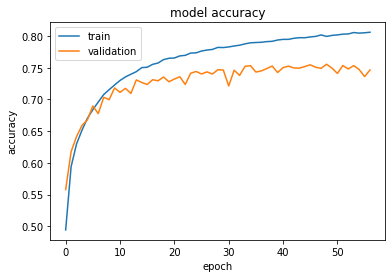

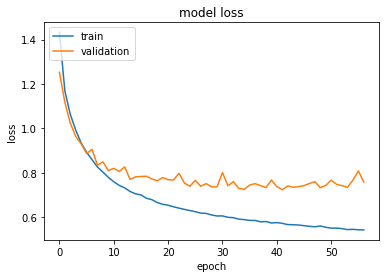

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/4cnn.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#4 cnn layers tune 1
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        73792     
                                                      

In [ ]:
#4 cnn layers tune 1
model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5')
# evaluate the model
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5')
_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.58620, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5
3252/3252 - 36s - loss: 1.3643 - accuracy: 0.5209 - val_loss: 1.1925 - val_accuracy: 0.5862 - 36s/epoch - 11ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.58620 to 0.63810, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5
3252/3252 - 30s - loss: 1.1054 - accuracy: 0.6165 - val_loss: 1.0514 - val_accuracy: 0.6381 - 30s/epoch - 9ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.63810 to 0.66363, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5
3252/3252 - 33s - loss: 0.9945 - accuracy: 0.6525 - val_loss: 0.9680 - val_accuracy: 0.6636 - 33s/epoch - 10ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.66363 to 0.68035, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/4cnn_1.h5
3252/3252 - 31s - loss: 0.9230 - acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


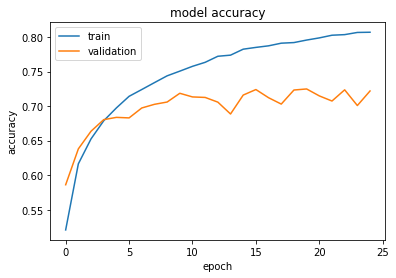

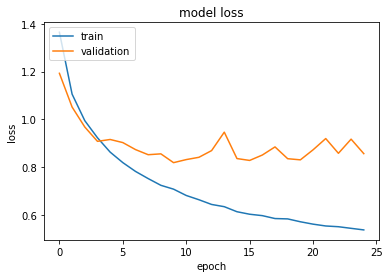

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/4cnn_1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

<center><h2>3 layers CNN</h2></center>

In [ ]:
#3 layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(30,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(30,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 30)        8670      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 6, 6, 30)         

In [ ]:
#8 layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(30,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(30,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_normal.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_normal.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.56690, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_normal.h5
3252/3252 - 24s - loss: 1.4445 - accuracy: 0.4923 - val_loss: 1.2330 - val_accuracy: 0.5669 - 24s/epoch - 7ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.56690 to 0.60250, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_normal.h5
3252/3252 - 12s - loss: 1.2219 - accuracy: 0.5756 - val_loss: 1.1314 - val_accuracy: 0.6025 - 12s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.60250 to 0.62115, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_normal.h5
3252/3252 - 12s - loss: 1.1407 - accuracy: 0.6041 - val_loss: 1.0782 - val_accuracy: 0.6211 - 12s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.62115 to 0.64594, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_m

In [ ]:
saved_model = load_model('/content/drive/MyDrive/ml/final/cnn/models/cnn_8l_normal.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 17s - loss: 0.5565 - accuracy: 0.8080 - 17s/epoch - 5ms/step
813/813 - 2s - loss: 0.7036 - accuracy: 0.7551 - 2s/epoch - 2ms/step
Train: 0.808, Test: 0.755


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


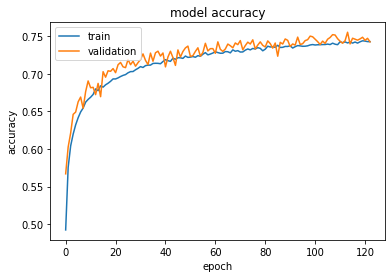

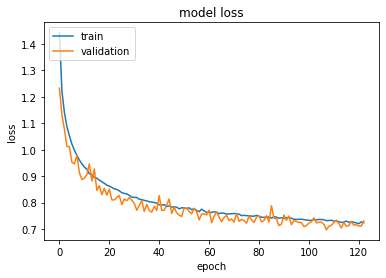

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
traindata, testdata, trainlabels, testlabels = train_test_split(traindata, trainlabels, random_state=32, test_size = 0.25)

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Garbage model/csv_files/cnn8l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#3 layers - tuning 1
model = models.Sequential()
model.add(layers.Conv2D(40, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 40)        1120      
                                                                 
 dropout_16 (Dropout)        (None, 30, 30, 40)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        23104     
                                                                 
 dropout_17 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 dropout_18 (Dropout)        (None, 26, 26, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 43264)            

In [ ]:
#3 layers - tuning 2
model = models.Sequential()
model.add(layers.Conv2D(40, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn8l1.h5')

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.62591, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5
3252/3252 - 33s - loss: 1.3205 - accuracy: 0.5370 - val_loss: 1.0713 - val_accuracy: 0.6259 - 33s/epoch - 10ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.62591 to 0.63510, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5
3252/3252 - 32s - loss: 1.0126 - accuracy: 0.6499 - val_loss: 1.0752 - val_accuracy: 0.6351 - 32s/epoch - 10ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.63510 to 0.63829, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5
3252/3252 - 33s - loss: 0.8295 - accuracy: 0.7106 - val_loss: 1.1008 - val_accuracy: 0.6383 - 33s/epoch - 10ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.63829 to 0.67324, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_8l_1.h5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


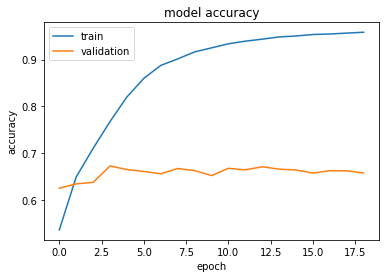

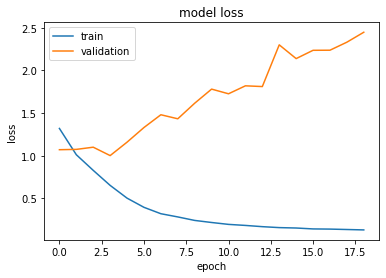

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Garbage model/csv_files/cnn8l_1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
saved_model = load_model('/content/drive/MyDrive/ml/final/cnn/models/cnn8l1.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 11s - loss: 0.0469 - accuracy: 0.9856 - 11s/epoch - 3ms/step
813/813 - 3s - loss: 2.4475 - accuracy: 0.6582 - 3s/epoch - 3ms/step
Train: 0.986, Test: 0.658


In [ ]:
#3 layers - tune 2
model = models.Sequential()
model.add(layers.Conv2D(50, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(50,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(50,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 dropout_20 (Dropout)        (None, 15, 15, 50)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 50)         0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 6, 6, 50)         

In [ ]:
#3 layers - tune 2
model = models.Sequential()
model.add(layers.Conv2D(50, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(50,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.07))
model.add(layers.Conv2D(50,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(300,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/best_model_8l_2.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])
model.save('/content/drive/MyDrive/ml/models/best_model_8l_2.h5')
saved_model = load_model('/content/drive/MyDrive/ml/models/best_model_8l_2.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.57228, saving model to /content/drive/MyDrive/ml/models/best_model_8l_2.h5
3252/3252 - 15s - loss: 1.4133 - accuracy: 0.5009 - val_loss: 1.2239 - val_accuracy: 0.5723 - 15s/epoch - 5ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.57228 to 0.61753, saving model to /content/drive/MyDrive/ml/models/best_model_8l_2.h5
3252/3252 - 14s - loss: 1.1689 - accuracy: 0.5945 - val_loss: 1.1111 - val_accuracy: 0.6175 - 14s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.61753 to 0.63410, saving model to /content/drive/MyDrive/ml/models/best_model_8l_2.h5
3252/3252 - 13s - loss: 1.0764 - accuracy: 0.6238 - val_loss: 1.0328 - val_accuracy: 0.6341 - 13s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.63410 to 0.65944, saving model to /content/drive/MyDrive/ml/models/best_model_8l_2.h5
3252/3252 - 13s - loss: 1.0086 - accuracy: 0.6459 - val_loss: 0.9663 - val_accuracy: 0.6594 - 13s/epoch - 4ms/

In [ ]:
saved_model = load_model('/content/drive/MyDrive/ml/final/cnn/models/cnn_8l_2.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 8s - loss: 0.3410 - accuracy: 0.8850 - 8s/epoch - 2ms/step
813/813 - 2s - loss: 0.5753 - accuracy: 0.7982 - 2s/epoch - 2ms/step
Train: 0.885, Test: 0.798


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


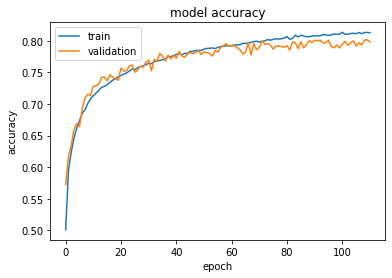

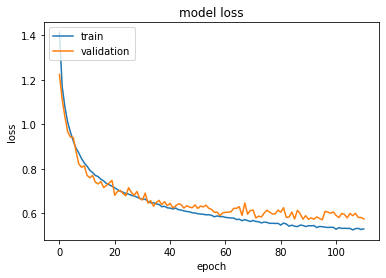

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_8l_2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

<center><h2>2 layers CNN</h2></center>

In [ ]:
#2 layers (normal)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(40,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 40)        11560     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 40)         0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 6, 6, 40)         

In [ ]:
#2 layers (normal)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(40,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5')
# evaluate the model
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5')
_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.56547, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5
3252/3252 - 11s - loss: 1.3937 - accuracy: 0.5083 - val_loss: 1.2670 - val_accuracy: 0.5655 - 11s/epoch - 3ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.56547 to 0.59627, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5
3252/3252 - 10s - loss: 1.2095 - accuracy: 0.5808 - val_loss: 1.1685 - val_accuracy: 0.5963 - 10s/epoch - 3ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.59627 to 0.61596, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5
3252/3252 - 10s - loss: 1.1416 - accuracy: 0.6055 - val_loss: 1.1059 - val_accuracy: 0.6160 - 10s/epoch - 3ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.61596 to 0.62910, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn_4l.h5
3252/3252 - 11s - loss: 1.1000 - accur

In [ ]:
model2 = load_model('/content/drive/MyDrive/ml/final/cnn/models/cnn_4l.h5')
_, train_acc = model2.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model2.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 8s - loss: 0.7290 - accuracy: 0.7503 - 8s/epoch - 2ms/step
813/813 - 2s - loss: 0.8835 - accuracy: 0.6950 - 2s/epoch - 2ms/step
Train: 0.750, Test: 0.695


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


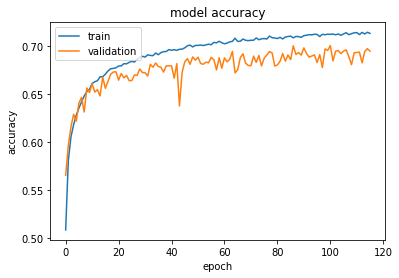

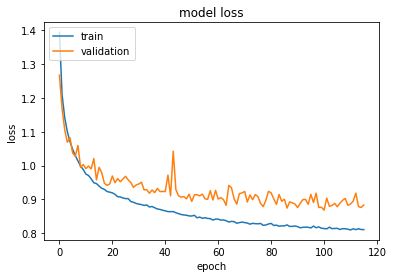

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Garbage model/csv_files/cnn_4l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#2 layers - tuning 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 6, 6, 64)         

In [ ]:
#2 layers - tuning 1 (*)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.04))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_6l_normal.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history_embedding = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_6l_normal.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l.h5')

# import matplotlib.pyplot as plt
# plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
# plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
# plt.legend(loc='lower right')
# plt.show()

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.62445, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_6l_normal.h5
3252/3252 - 24s - loss: 1.2964 - accuracy: 0.5466 - val_loss: 1.1019 - val_accuracy: 0.6245 - 24s/epoch - 7ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.62445 to 0.64725, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_6l_normal.h5
3252/3252 - 11s - loss: 1.0465 - accuracy: 0.6353 - val_loss: 1.0055 - val_accuracy: 0.6473 - 11s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.64725 to 0.68593, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_model_6l_normal.h5
3252/3252 - 12s - loss: 0.9155 - accuracy: 0.6806 - val_loss: 0.8959 - val_accuracy: 0.6859 - 12s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.68593 to 0.71192, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/best_m

In [ ]:
saved_model = load_model('/content/drive/MyDrive/ml/final/cnn/models/best_model_6l_normal.h5')

# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 7s - loss: 0.1538 - accuracy: 0.9489 - 7s/epoch - 2ms/step
813/813 - 2s - loss: 0.8598 - accuracy: 0.7699 - 2s/epoch - 2ms/step
Train: 0.949, Test: 0.770


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


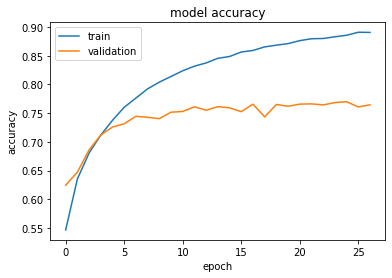

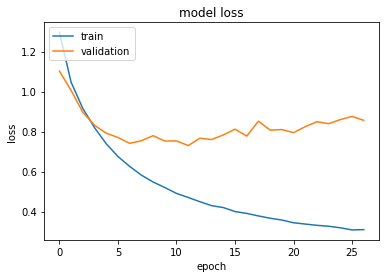

In [ ]:
history = history_embedding
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history_embedding.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Garbage model/csv_files/cnn6l_normal.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

<h4>New dataset</h4>

ocean waste


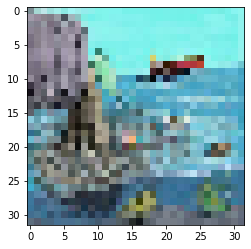

In [ ]:
saved_model = load_model('/content/best_model_8l_normal.h5')
img = "test9.jpg"

image =cv2.imread(img)
image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
testimg =cv2.resize(image, (32,32))
testimg = np.asarray(testimg)
import matplotlib.pyplot as plt
plt.imshow(testimg)
testimg = np.array(testimg).astype('float32')
testimg = testimg/ 255.0

testing = []
testing.append(testimg)
testing = np.array(testing)

pred = saved_model.predict(testing)

res = 0
max = -1
for i in range(9):
  if pred[0][i] > max:
    max = pred[0][i]
    res = i

print(mapping[res])

In [ ]:
#Generate predictions with the model using our X values
y_pred_arr = saved_model.predict(testdata)

y_pred = []
def intonum(pred):
  res = 0
  max = -1
  for i in range(9):
    if pred[i] > max:
      max = pred[i]
      res = i
  return res

for i in y_pred_arr:
  y_pred.append(intonum(i))

y_pred_arr = np.asarray(y_pred_arr)

y_true = testlabels
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[1726  200  176   12   32  103  120   35   21]
 [ 120 1802   61   29   17   39  118   47   18]
 [ 131   49 3952   13    9  174  122  192   19]
 [  55   59   60  450   16   62  157   24   25]
 [  56   16   24    4  464    8   46    9    5]
 [ 237   65  155   27   21 3916  372  226   51]
 [ 140  140  143   51   64  292 3726  242   51]
 [  97  120  171   26   20  238  491 2980   25]
 [  65   62   28   17    7  103   79   60  625]]


In [ ]:
testdata.shape

(571, 50, 50, 3)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


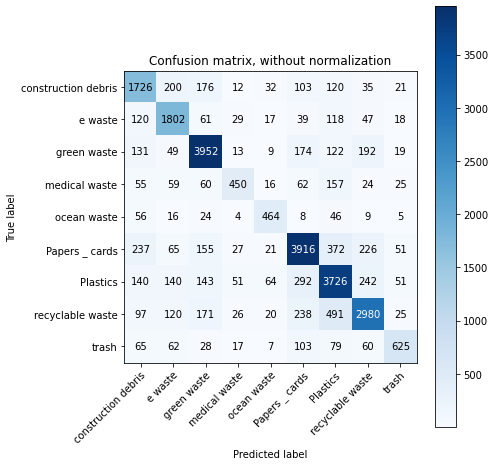

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without normalization')

In [ ]:
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt

i = 47

for i in range(400, 500):
    val = "i: "+str(i)+" True: "+str(mapping[y_true[i]])+"  Predicted: "+str(mapping[y_pred[i]])
    plt.figure()
    plt.title(val)
    imgplot = plt.imshow(testdata[i])

<h3>Pretraining (Transfer learning)</h3>

<center><h2>3 CNN layers preCNN</center>




In [ ]:
# 8 layers pretraining
model8pre = models.load_model('/content/drive/MyDrive/ml/models/best_model_8l_2.h5')
model8pre.pop()
model8pre.summary()

model = Sequential()
model.add(model8pre)
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 50)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 50)         

In [ ]:
# 8 layers pretraining
model8pre = models.load_model('/content/drive/MyDrive/ml/models/best_model_8l_2.h5')
model8pre.pop()
# model8pre.summary()

model = Sequential()
model.add(model8pre)
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/cnnpre_8l.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 300)               106800    
                                                                 
 flatten_1 (Flatten)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               150500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 9)                 4509      
                                                                 
Total params: 261,809
Trainable params: 261,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Splitted dataset
history=model.fit(traindata, trainlabels, validation_data=(testdata, testlabels), epochs=200, verbose=2, callbacks=[es, mc])

Epoch 1/200

Epoch 1: val_accuracy improved from -inf to 0.79000, saving model to /content/drive/MyDrive/ml/models/cnnpre_8l.h5
3252/3252 - 21s - loss: 0.6763 - accuracy: 0.7684 - val_loss: 0.6081 - val_accuracy: 0.7900 - 21s/epoch - 6ms/step
Epoch 2/200

Epoch 2: val_accuracy improved from 0.79000 to 0.79089, saving model to /content/drive/MyDrive/ml/models/cnnpre_8l.h5
3252/3252 - 14s - loss: 0.5938 - accuracy: 0.7931 - val_loss: 0.6004 - val_accuracy: 0.7909 - 14s/epoch - 4ms/step
Epoch 3/200

Epoch 3: val_accuracy improved from 0.79089 to 0.79669, saving model to /content/drive/MyDrive/ml/models/cnnpre_8l.h5
3252/3252 - 14s - loss: 0.5845 - accuracy: 0.7961 - val_loss: 0.5873 - val_accuracy: 0.7967 - 14s/epoch - 4ms/step
Epoch 4/200

Epoch 4: val_accuracy did not improve from 0.79669
3252/3252 - 14s - loss: 0.5819 - accuracy: 0.7962 - val_loss: 0.6217 - val_accuracy: 0.7875 - 14s/epoch - 4ms/step
Epoch 5/200

Epoch 5: val_accuracy improved from 0.79669 to 0.80458, saving model to /

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


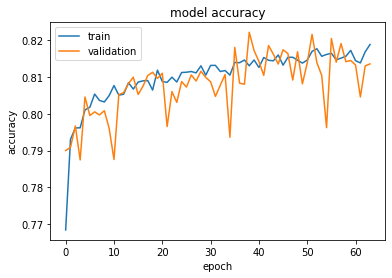

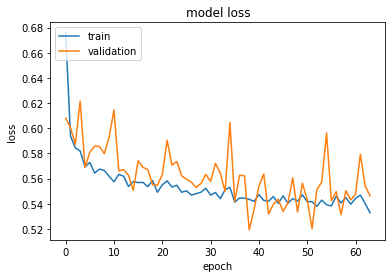

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_pre_8l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
saved_model = models.load_model('/content/drive/MyDrive/ml/final/cnn/models/pretrained/cnnpre_8l.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 19s - loss: 0.2801 - accuracy: 0.9065 - 19s/epoch - 6ms/step
813/813 - 2s - loss: 0.5193 - accuracy: 0.8222 - 2s/epoch - 2ms/step
Train: 0.906, Test: 0.822


In [ ]:
#Generate predictions with the model using our X values
y_pred_arr = saved_model.predict(testdata)

y_pred = []
def intonum(pred):
  res = 0
  max = -1
  for i in range(9):
    if pred[i] > max:
      max = pred[i]
      res = i
  return res

for i in y_pred_arr:
  y_pred.append(intonum(i))

y_pred_arr = np.asarray(y_pred_arr)

y_true = testlabels
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[1944  101  107   19   14   87   97   37   19]
 [  98 1940   26   19    7   35   75   43    8]
 [ 146   35 4155    7    5  136   60  106   11]
 [  30   57   30  601    6   48  103   26    7]
 [  28   11   11    1  515   12   40   11    3]
 [ 168   41  128   32   13 4102  322  217   47]
 [  99   99  113   34   36  209 4048  177   34]
 [  34   69  138   13   15  178  391 3306   24]
 [  28   38   14   18    1   57   71   45  774]]


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


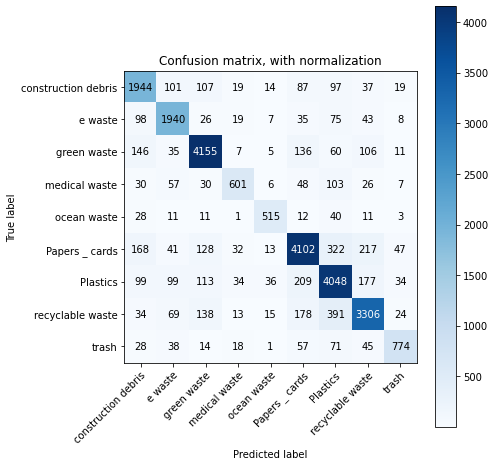

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=['construction debris', 'e waste', 'green waste', 'medical waste', 'ocean waste', 'Papers _ cards', 'Plastics', 'recyclable waste', 'trash']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, with normalization')

<h2><center>Inclass classification</center></h2>

In [ ]:
 def prep_pixels(test):
 	# convert from integers to floats
 	test_norm = np.array(test).astype('float32')
 	# normalize to range 0-0
 	test_norm = test_norm/ 255.0
 	# return normalized images
 	return test_norm

itestdata = prep_pixels(itestdata)

In [ ]:
itestdata.shape

(69, 32, 32, 3)

In [ ]:
ilabels = []
for l in itestlabels:
    ilabels.append(index(l))
itestlabels = ilabels
itestlabels = np.array(itestlabels)

In [ ]:
saved_model = models.load_model('/content/drive/MyDrive/ml/final/cnn/models/pretrained/cnnpre_8l.h5')
# evaluate the model
_, test_acc = saved_model.evaluate(itestdata, itestlabels, verbose=2)
print('Inclass Test Accuracy: %.3f' % (test_acc))

3/3 - 1s - loss: 5.9605 - accuracy: 0.2609 - 579ms/epoch - 193ms/step
Inclass Test Accuracy: 0.261


<h2><center>Other models (miscellenous)</center></h2> 

<center><h2>6 layers preCNN</h2></center>

In [ ]:
# 6 layers pretraining
model6pre = models.load_model('/content/drive/MyDrive/ml/models/cnn6l.h5')
model6pre.pop()
# model6pre.summary()

model = Sequential()
model.add(model6pre)
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/cnnpre_6l_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200)               480392    
                                                                 
 flatten_2 (Flatten)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 500)               100500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 9)                 4509      
                                                                 
Total params: 585,401
Trainable params: 585,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Splitted dataset
history=model.fit(traindata, trainlabels, validation_data=(testdata, testlabels), epochs=100, verbose=2, callbacks=[es, mc])

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.75805, saving model to /content/drive/MyDrive/ml/models/cnnpre_6l_2.h5
3252/3252 - 14s - loss: 0.4826 - accuracy: 0.8328 - val_loss: 0.7995 - val_accuracy: 0.7581 - 14s/epoch - 4ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.75805 to 0.76444, saving model to /content/drive/MyDrive/ml/models/cnnpre_6l_2.h5
3252/3252 - 14s - loss: 0.3751 - accuracy: 0.8672 - val_loss: 0.8048 - val_accuracy: 0.7644 - 14s/epoch - 4ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.76444 to 0.76686, saving model to /content/drive/MyDrive/ml/models/cnnpre_6l_2.h5
3252/3252 - 13s - loss: 0.3572 - accuracy: 0.8762 - val_loss: 0.8030 - val_accuracy: 0.7669 - 13s/epoch - 4ms/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.76686
3252/3252 - 13s - loss: 0.3515 - accuracy: 0.8786 - val_loss: 0.8439 - val_accuracy: 0.7644 - 13s/epoch - 4ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.76686 to 0.77516, saving mode

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


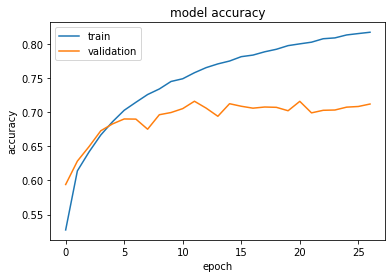

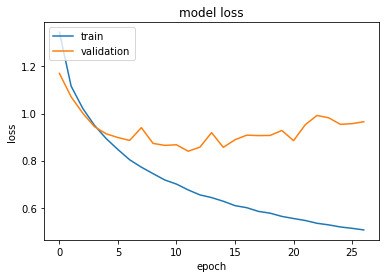

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/Garbage model/csv_files/cnn6l_1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

<center><h2>4 layers CNN</h2></center>

In [ ]:
#6 layers - tuning 1
model = models.Sequential()
model.add(layers.Conv2D(20, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.03))
model.add(layers.Conv2D(20,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.01))
model.add(layers.Flatten())
model.add(layers.Dense(200,activation = 'relu'))
model.add(layers.Dropout(0.08))
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5')

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.59408, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5
3252/3252 - 16s - loss: 1.3448 - accuracy: 0.5275 - val_loss: 1.1702 - val_accuracy: 0.5941 - 16s/epoch - 5ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.59408 to 0.62834, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5
3252/3252 - 12s - loss: 1.1162 - accuracy: 0.6140 - val_loss: 1.0708 - val_accuracy: 0.6283 - 12s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.62834 to 0.64967, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5
3252/3252 - 12s - loss: 1.0212 - accuracy: 0.6419 - val_loss: 1.0008 - val_accuracy: 0.6497 - 12s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.64967 to 0.67282, saving model to /content/drive/MyDrive/Colab Notebooks/Garbage model/models/cnn6l_1.h5
3252/3252 - 11s - loss: 0.9495 - a

In [ ]:
#4 layers - tune 1
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(16,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/cnn_4l_1.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])
model.save('/content/drive/MyDrive/ml/models/cnn_4l_1.h5')

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/ml/models/cnn_4l_1.h5')
# evaluate the model

_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.54391, saving model to /content/drive/MyDrive/ml/models/cnn_4l_1.h5
3252/3252 - 23s - loss: 1.4861 - accuracy: 0.4698 - val_loss: 1.3325 - val_accuracy: 0.5439 - 23s/epoch - 7ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.54391 to 0.55702, saving model to /content/drive/MyDrive/ml/models/cnn_4l_1.h5
3252/3252 - 10s - loss: 1.2946 - accuracy: 0.5521 - val_loss: 1.2788 - val_accuracy: 0.5570 - 10s/epoch - 3ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.55702 to 0.57428, saving model to /content/drive/MyDrive/ml/models/cnn_4l_1.h5
3252/3252 - 11s - loss: 1.2386 - accuracy: 0.5722 - val_loss: 1.2423 - val_accuracy: 0.5743 - 11s/epoch - 3ms/step
Epoch 4/400

Epoch 4: val_accuracy did not improve from 0.57428
3252/3252 - 10s - loss: 1.2023 - accuracy: 0.5854 - val_loss: 1.2189 - val_accuracy: 0.5734 - 10s/epoch - 3ms/step
Epoch 5/400

Epoch 5: val_accuracy improved from 0.57428 to 0.59477, saving model to /con

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


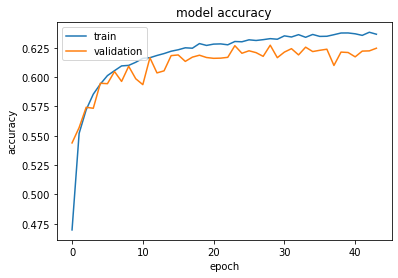

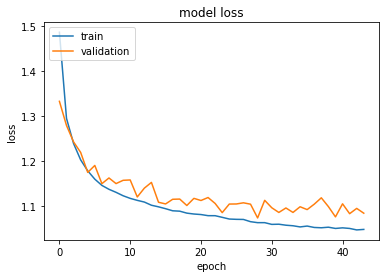

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_4l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#4 layers - tune 2
model = models.Sequential()
model.add(layers.Conv2D(40, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(40,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/cnn_4l_2.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])
model.save('/content/drive/MyDrive/ml/models/cnn_4l_2.h5')

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/ml/models/cnn_4l_2.h5')
# evaluate the model

_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.57059, saving model to /content/drive/MyDrive/ml/models/cnn_4l_2.h5
3252/3252 - 14s - loss: 1.3869 - accuracy: 0.5148 - val_loss: 1.2633 - val_accuracy: 0.5706 - 14s/epoch - 4ms/step
Epoch 2/400

Epoch 2: val_accuracy improved from 0.57059 to 0.59050, saving model to /content/drive/MyDrive/ml/models/cnn_4l_2.h5
3252/3252 - 11s - loss: 1.1946 - accuracy: 0.5847 - val_loss: 1.1774 - val_accuracy: 0.5905 - 11s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy improved from 0.59050 to 0.59423, saving model to /content/drive/MyDrive/ml/models/cnn_4l_2.h5
3252/3252 - 11s - loss: 1.1213 - accuracy: 0.6109 - val_loss: 1.1706 - val_accuracy: 0.5942 - 11s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy improved from 0.59423 to 0.62207, saving model to /content/drive/MyDrive/ml/models/cnn_4l_2.h5
3252/3252 - 10s - loss: 1.0700 - accuracy: 0.6281 - val_loss: 1.0807 - val_accuracy: 0.6221 - 10s/epoch - 3ms/step
Epoch 5/400

Epoch 5: v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


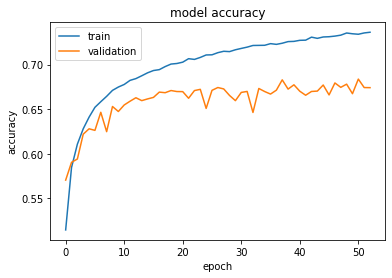

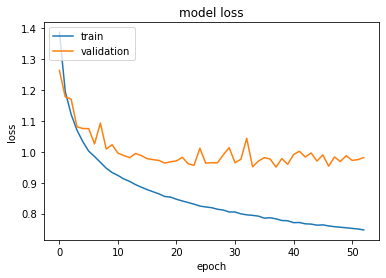

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_4l_2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


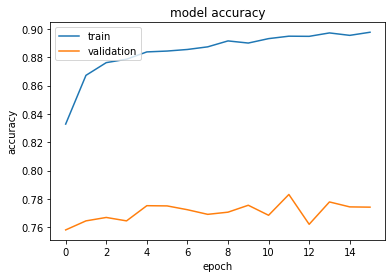

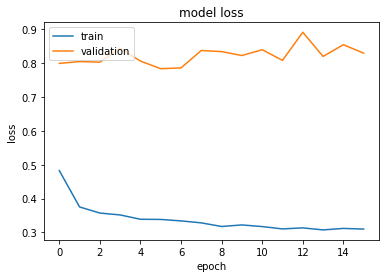

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_pre_6l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 8s - loss: 0.1241 - accuracy: 0.9626 - 8s/epoch - 2ms/step
813/813 - 2s - loss: 0.8296 - accuracy: 0.7741 - 2s/epoch - 2ms/step
Train: 0.963, Test: 0.774


In [ ]:
# 4 layers pretraining
model4pre = models.load_model('/content/drive/MyDrive/ml/models/cnn_4l_2.h5')
model4pre.pop()

model = Sequential()
model.add(model6pre)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])
model.summary()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('/content/drive/MyDrive/ml/models/cnnpre_4l_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200)               480392    
                                                                 
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 200)               40200     
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 9)                 1809      
                                                                 
Total params: 522,401
Trainable params: 522,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Splitted dataset
history=model.fit(traindata, trainlabels, validation_data=(testdata, testlabels), epochs=400, verbose=2, callbacks=[es, mc])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.77809, saving model to /content/drive/MyDrive/ml/models/cnnpre_4l_2.h5
3252/3252 - 13s - loss: 0.4604 - accuracy: 0.8488 - val_loss: 0.7997 - val_accuracy: 0.7781 - 13s/epoch - 4ms/step
Epoch 2/400

Epoch 2: val_accuracy did not improve from 0.77809
3252/3252 - 13s - loss: 0.2989 - accuracy: 0.8996 - val_loss: 0.8542 - val_accuracy: 0.7676 - 13s/epoch - 4ms/step
Epoch 3/400

Epoch 3: val_accuracy did not improve from 0.77809
3252/3252 - 13s - loss: 0.2816 - accuracy: 0.9043 - val_loss: 0.8392 - val_accuracy: 0.7709 - 13s/epoch - 4ms/step
Epoch 4/400

Epoch 4: val_accuracy did not improve from 0.77809
3252/3252 - 13s - loss: 0.2752 - accuracy: 0.9062 - val_loss: 0.8364 - val_accuracy: 0.7774 - 13s/epoch - 4ms/step
Epoch 5/400

Epoch 5: val_accuracy did not improve from 0.77809
3252/3252 - 13s - loss: 0.2688 - accuracy: 0.9089 - val_loss: 0.8728 - val_accuracy: 0.7725 - 13s/epoch - 4ms/step
Epoch 6/400

Epoch 6: val_accuracy did 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


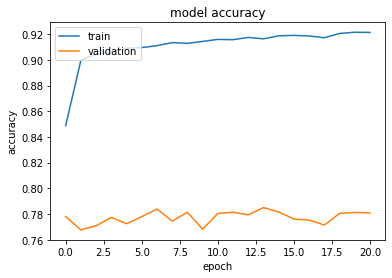

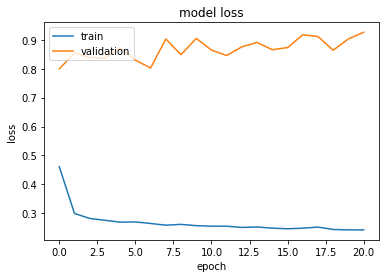

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


import pandas as pd
import h5py

hist_df = pd.DataFrame(history.history) 
hist_csv_file = '/content/drive/MyDrive/ml/csv_files/cnn_pre_4l.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
saved_model = models.load_model('/content/drive/MyDrive/ml/models/cnnpre_4l_2.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = saved_model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

3252/3252 - 8s - loss: 0.0677 - accuracy: 0.9785 - 8s/epoch - 2ms/step
813/813 - 2s - loss: 0.8912 - accuracy: 0.7850 - 2s/epoch - 2ms/step
Train: 0.978, Test: 0.785


In [ ]:
#4 cnn layers
model = models.Sequential()
model.add(layers.Conv2D(256, (3,3), input_shape = (32, 32, 3), strides=1, use_bias=True, data_format="channels_last", activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(layers.Conv2D(256,(3,3), activation = 'relu'))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(9,activation = 'softmax'))
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, patience=15)
mc = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/6cnn.h5', monitor='val_accuracy', mode='max', verbose=2, save_best_only=True)

history = model.fit(traindata, trainlabels, validation_data=(testdata, testlabels),  epochs=400, verbose=2, callbacks=[es, mc])

from tensorflow.keras.models import load_model
saved_model = load_model('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/6cnn.h5')
# evaluate the model
model.save('/content/drive/MyDrive/Colab Notebooks/Garbage model/models/6cnn.h5')
_, train_acc = model.evaluate(traindata, trainlabels, verbose=2)
_, test_acc = model.evaluate(testdata, testlabels, verbose=2)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))